In [229]:
import numpy as np
import pandas as pd
import os
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import re
from os.path import dirname
import sklearn as skl
from sklearn import decomposition 

## Importing cleaned data sets

In [230]:
curr_path = dirname(os.getcwd())
table_path = curr_path + '/clean_data'

In [231]:
file_list = os.listdir(table_path)
file_list = [table_path + '/' + i for i in file_list]
file_list

['/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/big_five_CLEAN.csv',
 '/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/deadlines_CLEAN.csv',
 '/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/flourishing_scale_CLEAN.csv',
 '/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/grades_CLEAN.csv',
 '/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/loneliness_scale_CLEAN.csv',
 '/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/panas_CLEAN.csv',
 '/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/perceived_stress_CLEAN.csv',
 '/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/phq_9_CLEAN.csv',
 '/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/piazza_CLEAN.csv',
 '/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/psqi_CLEAN.csv',
 '/Users/mark/Desktop/GitHub/student_stress_repo/clean_data/vr_12_CLEAN.csv']

In [232]:
deadlines_df = pd.read_csv(file_list[1], index_col=0)
flourishing_df = pd.read_csv(file_list[2], index_col = 0)
grades_df = pd.read_csv(file_list[3], index_col = 0)
loneliness_df = pd.read_csv(file_list[4], index_col = 0)
panas_df = pd.read_csv(file_list[5], index_col = 0)
stress_df = pd.read_csv(file_list[6], index_col = 0)
phq_9 = pd.read_csv(file_list[7], index_col = 0)
piazza_df = pd.read_csv(file_list[8], index_col = 0)
psqi_df = pd.read_csv(file_list[9], index_col = 0)
vr_12_df = pd.read_csv(file_list[10], index_col = 0)
big_5_df = pd.read_csv(file_list[0], index_col = 0)

## Summarizing Data

Some KEY POINTS:

- All in all we have **10** data sets to work with, one of which is the **stress** data set, which is our objective prediction metric. Because we hope to predict a single value for stress, we will most likely have to find some way to condense the information from the stress data set into a single value. Given this information, we are left with 9 data sets to use as features in our model

- All of our data contains information on students from a CS class in Dartmouth of which there are **48** members. Datasets we are using can be categorized into 2 main categories: survey based data and academic based data. The main distinction between these types of datasets is 1.) the content of survey based data aim to capture subjective data while academic data is much more emperical, and 2.) that survey based data was collected **twice**, once before the beginnning of the spring quarter of 2013, and once after; therefore we have 2 rows of data for each student in the survey based data and just 1 in the academic.

- As mentioned before, we have assigned numerical values to replace categorical answers used in the survey based datasets for convenience of processing. Numerical values correspond to the severity of the answer, either in measuring a level of frequency, severity, or agree-ance.

Potential Drawbacks:

- Right of the bat, the **biggest** challenge to overcome will be creating a proper model with our extremely limited number of data points (96). Unfortunately there have been, to my group's knowledge, no data sets giving similair data to the Dartmouth data set that is available for sharing, and thus, this is what we will work with; if additional data should be found in later stages, it will be fed into the model. There are some statistical methods we can use to work with such a small amount of data points, such as parametric models or Bayesian inference. So we will keep these in mind

- Stemming from the first problem, we will also have to deal with our dimensions d being larger than data points n. My initial thought is to use kernelization in order to combat this problem, as well as feature selection through step forward methods or PCA.

## Some Data Exploration
- at this stage we will dig into our data to get a greater sense of its underlying patterns; this process will hopefully guide us in creating a fitting model

lets start with the **deadlines** data set, which provides the number of deadlines by day for each of our Dartmount Students
- we can view this data in multiples ways, the most revealing I beleive is by observing:
    1. total number of deadlines (per week)
    2. how close in proximity deadlines are to eachother
    3. days of the week deadlines fall on

In [202]:
len(deadlines_df.columns)

72

We see that deadlines are only given for a period of **72** days, a little more than two months.
This would make sense since Dartmouth is on the quarter system.

Lets see which dates are used.

In [203]:
deadlines_df.columns[1:]

Index(['2013-03-27', '2013-03-28', '2013-03-29', '2013-03-30', '2013-03-31',
       '2013-04-01', '2013-04-02', '2013-04-03', '2013-04-04', '2013-04-05',
       '2013-04-06', '2013-04-07', '2013-04-08', '2013-04-09', '2013-04-10',
       '2013-04-11', '2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
       '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19', '2013-04-20',
       '2013-04-21', '2013-04-22', '2013-04-23', '2013-04-24', '2013-04-25',
       '2013-04-26', '2013-04-27', '2013-04-28', '2013-04-29', '2013-04-30',
       '2013-05-01', '2013-05-02', '2013-05-03', '2013-05-04', '2013-05-05',
       '2013-05-06', '2013-05-07', '2013-05-08', '2013-05-09', '2013-05-10',
       '2013-05-11', '2013-05-12', '2013-05-13', '2013-05-14', '2013-05-15',
       '2013-05-16', '2013-05-17', '2013-05-18', '2013-05-19', '2013-05-20',
       '2013-05-21', '2013-05-22', '2013-05-23', '2013-05-24', '2013-05-25',
       '2013-05-26', '2013-05-27', '2013-05-28', '2013-05-29', '2013-05-30',

Lets add a total and total/week column to our set for each student

In [235]:
deadlines_df.head()

,uid,2013-03-27,2013-03-28,2013-03-29,2013-03-30,2013-03-31,2013-04-01,2013-04-02,2013-04-03,2013-04-04,...,2013-05-27,2013-05-28,2013-05-29,2013-05-30,2013-05-31,2013-06-01,2013-06-02,2013-06-03,2013-06-04,2013-06-05
0,u01,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,u02,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
2,u03,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,u04,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,u05,0,0,0,0,1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0


In [205]:
deadlines_df['total'] = np.sum(deadlines_df.iloc[:,1:len(deadlines_df.columns)], axis = 1)

In [206]:
deadlines_df.head()

,uid,2013-03-27,2013-03-28,2013-03-29,2013-03-30,2013-03-31,2013-04-01,2013-04-02,2013-04-03,2013-04-04,...,2013-05-28,2013-05-29,2013-05-30,2013-05-31,2013-06-01,2013-06-02,2013-06-03,2013-06-04,2013-06-05,total
0,u01,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,10
1,u02,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,12
2,u03,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,15
3,u04,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,7
4,u05,0,0,0,0,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,17


(array([ 5., 14., 12.,  3.,  4.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 7.  , 10.85, 14.7 , 18.55, 22.4 , 26.25, 30.1 , 33.95, 37.8 ,
        41.65, 45.5 , 49.35, 53.2 , 57.05, 60.9 , 64.75, 68.6 , 72.45,
        76.3 , 80.15, 84.  ]),
 <a list of 20 Patch objects>)

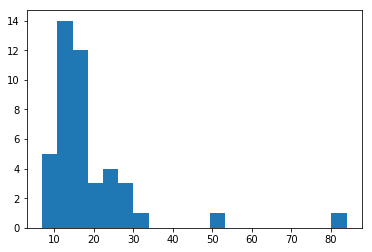

In [207]:
plt.hist(deadlines_df['total'], bins = 20)

In [208]:
deadlines_df['per_week'] = deadlines_df['total']/7

In [209]:
deadlines_df.head()

,uid,2013-03-27,2013-03-28,2013-03-29,2013-03-30,2013-03-31,2013-04-01,2013-04-02,2013-04-03,2013-04-04,...,2013-05-29,2013-05-30,2013-05-31,2013-06-01,2013-06-02,2013-06-03,2013-06-04,2013-06-05,total,per_week
0,u01,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,10,1.428571
1,u02,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,12,1.714286
2,u03,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,15,2.142857
3,u04,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,7,1.000000
4,u05,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,17,2.428571


some miscellaneous exploration
- observing deadlines by date rather by student

In [210]:
by_day_df = deadlines_df.drop(columns = ['total', 'per_week']).set_index('uid').transpose()
by_day_df.reset_index(inplace = True)
by_day_df.head()

uid,index,u01,u02,u03,u04,u05,u07,u08,u09,u10,...,u47,u49,u50,u51,u52,u53,u54,u57,u58,u59
0,2013-03-27,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1,2013-03-28,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2013-03-29,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,1
3,2013-03-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-03-31,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [211]:
type(by_day_df['index'][0])

str

In [212]:
from datetime import datetime

In [213]:
by_day_df['index'] = [datetime.strptime(i, '%Y-%m-%d') for i in by_day_df['index']]

In [214]:
by_day_df['weekday'] = [i.weekday() for i in by_day_df['index']]

In [215]:
by_day_df['total'] = np.sum(by_day_df.iloc[:,0:len(by_day_df.columns) - 1], axis = 1)
by_day_df.head()

uid,index,u01,u02,u03,u04,u05,u07,u08,u09,u10,...,u50,u51,u52,u53,u54,u57,u58,u59,weekday,total
0,2013-03-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
1,2013-03-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
2,2013-03-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,4,6
3,2013-03-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
4,2013-03-31,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,6,9


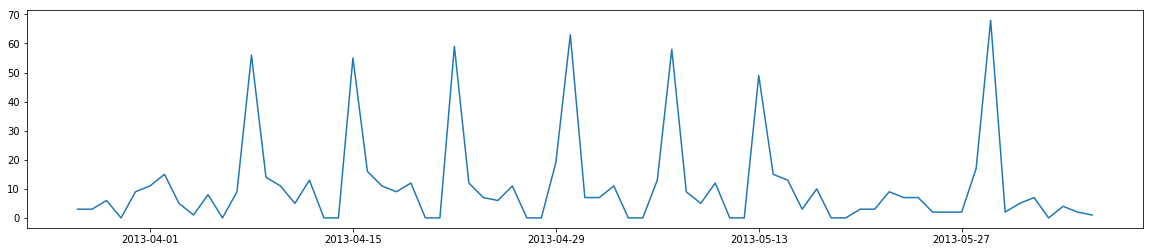

In [216]:
x = by_day_df['index']
y = by_day_df['total']

plt.figure(figsize=(20,4))
plt.plot(x,y)

In [217]:
by_day_df.groupby('weekday').sum()

uid,u01,u02,u03,u04,u05,u07,u08,u09,u10,u12,...,u49,u50,u51,u52,u53,u54,u57,u58,u59,total
weekday,,,,,,,,,,,,,,,,,,,,,
0,4,4,6,4,5,10,6,4,4,6,...,23,10,4,4,4,6,10,4,17,271
1,3,7,2,2,7,7,6,2,7,9,...,11,2,5,7,2,2,2,2,8,215
2,3,1,4,1,2,3,3,1,4,8,...,20,3,2,1,1,11,3,1,4,144
3,0,0,0,0,0,0,2,0,0,1,...,11,0,0,1,0,0,0,0,7,48
4,0,0,2,0,1,0,1,0,0,1,...,19,0,0,0,0,11,0,0,16,95
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,9
6,0,0,1,0,2,0,0,0,2,2,...,0,0,0,2,0,0,0,0,0,20


seems monday was a big day for deadlines

moving on

## flourishing data

The Flourishing Scale is a brief 8-item summary measure of the respondent's self-perceived success in important areas such as relationships, self-esteem, purpose, and optimism. The scale provides a single psychological well-being score. - Ed Diener

In [218]:
flourishing_df.head()

,uid,type,I lead a purposeful and meaningful life,My social relationships are supportive and rewarding,I am engaged and interested in my daily activities,I actively contribute to the happiness and well-being of others,I am competent and capable in the activities that are important to me,I am a good person and live a good life,I am optimistic about my future,People respect me
0,u00,pre,7,6,5.0,6.0,6.0,7.0,7,4
1,u01,pre,4,6,6.0,6.0,7.0,6.0,4,6
2,u02,pre,6,7,5.0,6.0,5.0,6.0,4,7
3,u03,pre,6,2,2.0,4.0,5.0,6.0,5,4
4,u04,pre,3,5,4.0,3.0,2.0,2.0,3,5


In [219]:
flourishing_df['total'] = np.sum(flourishing_df.iloc[:, 2:10], axis = 1)

In [220]:
flour_pre = flourishing_df[flourishing_df['type'] == 'pre']
flour_post = flourishing_df[flourishing_df['type'] == 'post']

(array([ 2.,  0.,  0.,  1.,  4.,  3.,  7., 11., 12.,  6.]),
 array([15. , 18.9, 22.8, 26.7, 30.6, 34.5, 38.4, 42.3, 46.2, 50.1, 54. ]),
 <a list of 10 Patch objects>)

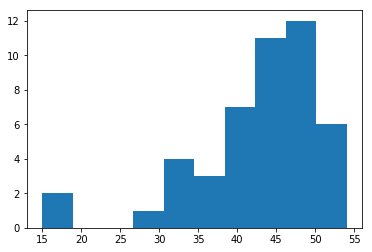

In [221]:
plt.hist(flour_pre['total'])

(array([1., 1., 0., 3., 1., 4., 6., 9., 7., 5.]),
 array([16., 20., 24., 28., 32., 36., 40., 44., 48., 52., 56.]),
 <a list of 10 Patch objects>)

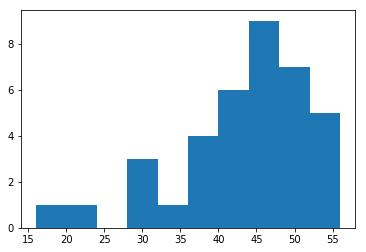

In [222]:
plt.hist(flour_post['total'])

## Stress dataset

this will be an important set to analyze, since it will ultimately become our predicted variable in our regression model

In [223]:
stress_df.head(10)

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,u00,pre,2,2,3,1,2,4,2,2,3,3
1,u01,pre,2,2,2,2,1,2,1,1,1,1
2,u02,pre,3,2,2,1,3,2,3,2,2,1
3,u03,pre,2,1,2,3,2,0,3,4,0,0
4,u04,pre,1,1,3,2,2,3,2,3,2,2
5,u05,pre,1,2,1,0,0,1,1,0,1,0
6,u07,pre,2,1,3,0,0,1,1,1,2,1
7,u08,pre,2,3,4,2,2,2,1,2,2,3
8,u09,pre,1,1,2,2,1,1,1,2,1,1
9,u10,pre,3,3,3,1,1,2,3,0,3,1


In [224]:
stress_df['total'] = np.sum(stress_df.iloc[:,2:len(stress_df.columns)], axis = 1)

In [225]:
stress_pre = stress_df[stress_df['type'] == 'pre']
stress_post = stress_df[stress_df['type'] == 'post']

(array([1., 2., 5., 8., 3., 9., 8., 5., 2., 3.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33.]),
 <a list of 10 Patch objects>)

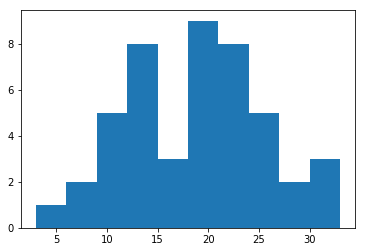

In [226]:
plt.hist(stress_pre['total'])

(array([4., 3., 8., 4., 5., 4., 3., 4., 2., 2.]),
 array([ 7. ,  9.7, 12.4, 15.1, 17.8, 20.5, 23.2, 25.9, 28.6, 31.3, 34. ]),
 <a list of 10 Patch objects>)

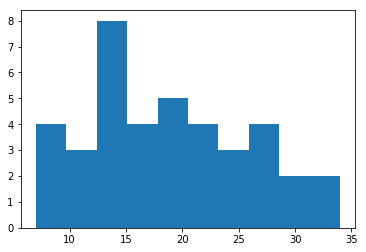

In [227]:
plt.hist(stress_post['total'])